# Greataxe vs Greatsword??

### Background
There is constant debate whether Greataxe (1d12) or Greatsword (2d6) is better for Barbarians.

* Min damage is 2 for GS instead of 1 for GA
* Consistent damage with GS (bell curve) instead of all equal chance with GA
* Average damage of 2d6 is 7, while average damage of 1d12 is 6.5.

However, Barbarian (and half-orc) have the ability to add an extra weapon die on a critical. This means on a crit, greatsword adds 1d6 but greataxe adds 1d12.

### So which is better?

In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

In [12]:
numtrials = 50000
advantage = 75 # # between 0 and 100

In [19]:
dmg_df = pd.DataFrame()
for brutal in range(0,4):
    greatsword = []
    greataxe = []
    for target_ac in range(15,26):
        greatsword_ac = []
        greataxe_ac = []
        for trials in range(numtrials):
            # Assuming Reckless, so constant advantage
            if random.random() < advantage/100:
                roll = max(random.randint(1,20),random.randint(1,20))
            else:
                roll = random.randint(1,20)
            if roll == 20:# or roll == 19:
                greatsword_ac.append(random.randint(1,6)+random.randint(1,6)+random.randint(1,6)+random.randint(1,6))
                greataxe_ac.append(random.randint(1,12)+random.randint(1,12))
                for _ in range(brutal):
                    greatsword_ac.append(random.randint(1,6))
                    greataxe_ac.append(random.randint(1,12))
            elif roll+brutal+3+5 >= target_ac:
                greatsword_ac.append(random.randint(1,6)+random.randint(1,6))
                greataxe_ac.append(random.randint(1,12))
        greatsword.append(np.sum(greatsword_ac)/numtrials)
        greataxe.append(np.sum(greataxe_ac)/numtrials)
    dmg_df[f'greatsword + {str(brutal)} extra crit dice'] = greatsword
    dmg_df[f'greataxe + {str(brutal)} extra crit dice'] = greataxe

In [20]:
dmg_df

,greatsword + 0 extra crit dice,greataxe + 0 extra crit dice,greatsword + 1 extra crit dice,greataxe + 1 extra crit dice,greatsword + 2 extra crit dice,greataxe + 2 extra crit dice,greatsword + 3 extra crit dice,greataxe + 3 extra crit dice
0,6.60850,6.12748,7.12732,6.92150,7.63068,7.60176,8.12666,8.40812
1,6.34636,5.87244,6.92278,6.70186,7.45614,7.46118,7.93852,8.22874
2,6.03254,5.55414,6.65130,6.44916,7.20062,7.23322,7.74784,7.99950
3,5.78884,5.36436,6.33980,6.14112,6.96864,7.04978,7.52568,7.83850
4,5.37474,5.01686,6.03096,5.85992,6.65548,6.73468,7.25976,7.63584
5,5.07756,4.71416,5.70332,5.57478,6.30210,6.39692,6.95564,7.33474
6,4.72960,4.40574,5.34528,5.27348,6.02284,6.14414,6.63520,6.98128
7,4.30050,4.00606,4.94458,4.85576,5.66054,5.82220,6.29798,6.68568
8,3.81642,3.52854,4.52556,4.46208,5.25810,5.45410,5.93700,6.33696
9,3.26948,3.03910,4.15910,4.12228,4.86472,5.09568,5.53394,5.94956


In [21]:
dmg_df.index = range(15,26)

In [22]:
dmg_df

,greatsword + 0 extra crit dice,greataxe + 0 extra crit dice,greatsword + 1 extra crit dice,greataxe + 1 extra crit dice,greatsword + 2 extra crit dice,greataxe + 2 extra crit dice,greatsword + 3 extra crit dice,greataxe + 3 extra crit dice
15,6.60850,6.12748,7.12732,6.92150,7.63068,7.60176,8.12666,8.40812
16,6.34636,5.87244,6.92278,6.70186,7.45614,7.46118,7.93852,8.22874
17,6.03254,5.55414,6.65130,6.44916,7.20062,7.23322,7.74784,7.99950
18,5.78884,5.36436,6.33980,6.14112,6.96864,7.04978,7.52568,7.83850
19,5.37474,5.01686,6.03096,5.85992,6.65548,6.73468,7.25976,7.63584
20,5.07756,4.71416,5.70332,5.57478,6.30210,6.39692,6.95564,7.33474
21,4.72960,4.40574,5.34528,5.27348,6.02284,6.14414,6.63520,6.98128
22,4.30050,4.00606,4.94458,4.85576,5.66054,5.82220,6.29798,6.68568
23,3.81642,3.52854,4.52556,4.46208,5.25810,5.45410,5.93700,6.33696
24,3.26948,3.03910,4.15910,4.12228,4.86472,5.09568,5.53394,5.94956


The damage listed here is only the weapon damage, no rage, modifiers, or anythign else.

<function matplotlib.pyplot.show(*args, **kw)>

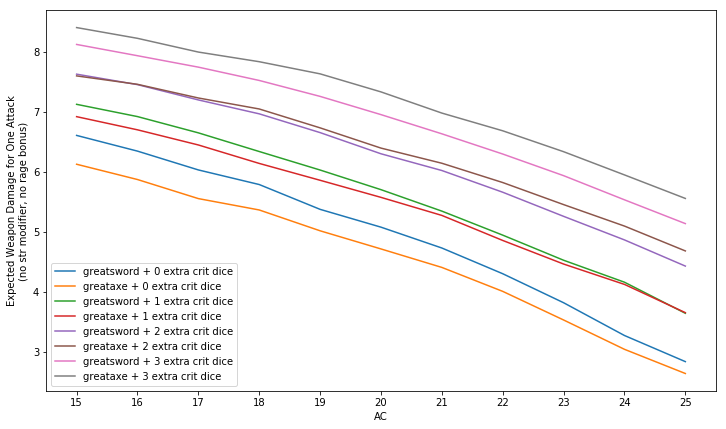

In [30]:
plt.figure(figsize=(12,7))
plt.plot(dmg_df.index,dmg_df)
plt.legend(dmg_df.columns,loc="best")
plt.xlabel("AC")
plt.xticks(range(15,26,1))
plt.ylabel('Expected Weapon Damage for One Attack\n(no str modifier, no rage bonus)')
plt.savefig("brutalcritical20.png")
plt.show

# Conclusion

* At no extra dice (Orange, Blue), GS>GA
* At 1 extra die (Red, Green), GS>GA but by less, and at very high ACs, they approach each other (as a higher % of hits are crits)
* At 2 extra dice (Brown, Purple), GA>GS, close at low ACs, but a larger gap opens at higher ACs.
* At 3 extra dice (Gray, Pink), GA>>GS, never a question about it.

Note: A 17+ level Half-Orc Barbarian will actually have 4 extra dice (3 from Barbarian Brutal Critical and 1 from Half-Orc Savage Attacks), and assumedly the gap will widen.

# tl;dr:

At low levels, use Greatsword. Once you have two extra dice, switch to Greataxe. This assumes you are always reckless attacking.

0.31473125642324973